Enter your image description: A man Walking in a Park


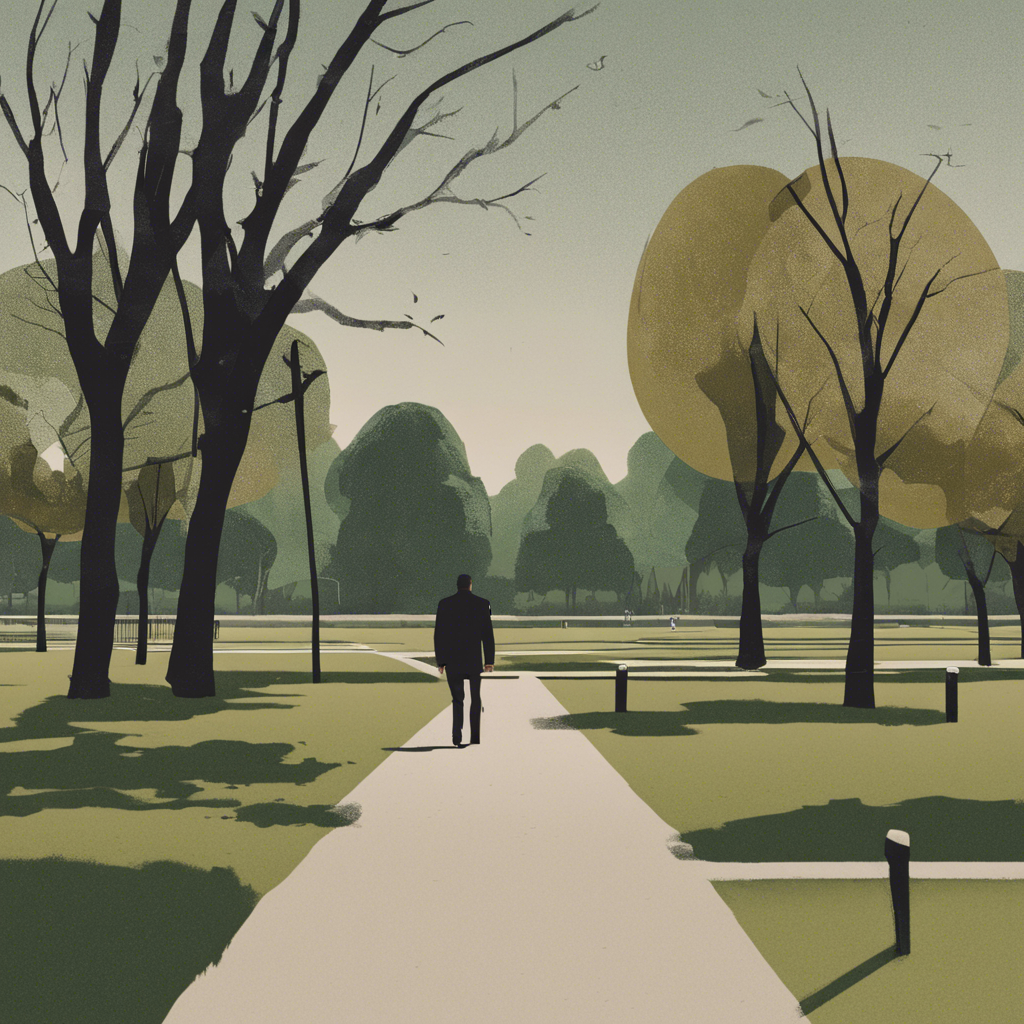

Image generated successfully: /content/generated_image.png


In [5]:
import os
import requests
from PIL import Image
from io import BytesIO
import base64
from IPython.display import display, Image as IPImage

def generate_image(prompt: str) -> str:
    # Set your API Key here directly in Colab
    API_KEY = "sk-7S9CX6xLmBoND7S1pFxnNnWiaND2vc1bMfWih3S5L3LqxphT"  # Replace with your actual API key
    API_HOST = "https://api.stability.ai"

    if not API_KEY:
        raise ValueError("Missing Stability AI API key. Please set your API_KEY.")

    headers = {
        "Content-Type": "application/json",
        "Accept": "application/json",
        "Authorization": f"Bearer {API_KEY}"
    }

    payload = {
        "text_prompts": [{"text": prompt, "weight": 1}],
        "cfg_scale": 7,
        "height": 1024,
        "width": 1024,
        "steps": 30,
        "samples": 1
    }

    response = requests.post(f"{API_HOST}/v1/generation/stable-diffusion-xl-1024-v1-0/text-to-image",
                             json=payload, headers=headers)

    if response.status_code != 200:
        raise Exception(f"API Error: {response.json().get('message', response.reason)} (Status: {response.status_code})")

    result = response.json()
    if not result.get("artifacts") or not result["artifacts"][0].get("base64"):
        raise ValueError("Invalid response from API: No image data received")

    image_data = result["artifacts"][0]["base64"]
    image = Image.open(BytesIO(base64.b64decode(image_data)))

    # Save the image to the Colab environment
    image_path = "/content/generated_image.png"
    image.save(image_path)

    # Display the image inline in Colab
    display(IPImage(image_path))

    return image_path

if __name__ == "__main__":
    prompt = input("Enter your image description: ")
    try:
        image_path = generate_image(prompt)
        print(f"Image generated successfully: {image_path}")
    except Exception as e:
        print(f"Error: {e}")
